In [373]:
import theano
import numpy as np
from theano import tensor as T

In [826]:
x = T.vector('x')
W1 = T.matrix('W1')

In [827]:
u1 = T.dot(W1,x)

In [828]:
f = theano.function([x,W1],u1)

In [861]:
p = 2
H = 4
xtest = np.random.randn(p)
W1test = np.random.randn(p*H).reshape((H,p))
#ctest = np.random.randn(H) #np.array([0,-1])
w2test = np.random.randn(H)

In [862]:
np.dot(W1test,xtest)

array([-2.15644465,  1.1373422 ,  0.72897413,  0.72089351])

In [863]:
W1test, w2test

(array([[-2.29076691,  0.2329384 ],
        [ 1.52319618,  0.03898188],
        [ 1.01243217,  0.04355572],
        [-0.36766436, -0.66018873]]),
 array([-0.82050505, -0.49632092, -1.37141905,  1.93620178]))

In [864]:
f(xtest,W1test)

array([-2.15644465,  1.1373422 ,  0.72897413,  0.72089351])

In [865]:
h = T.nnet.relu(u1)
w2 = T.vector('w2')
u2 = T.dot(h,w2)
y = T.scalar('y')
prob = T.nnet.sigmoid(u2)
R = - y * T.log(prob) - (1 - y) * T.log(1 - prob)

In [866]:
w2g = T.grad(R,w2)
W1g = T.grad(R,W1)

In [867]:
print(theano.pp(w2g))

((((((fill((((-y) * log(sigmoid(((TensorConstant{0.5} * ((W1 \dot x) + |(W1 \dot x)|)) \dot w2)))) - ((TensorConstant{1} - y) * log((TensorConstant{1} - sigmoid(((TensorConstant{0.5} * ((W1 \dot x) + |(W1 \dot x)|)) \dot w2)))))), TensorConstant{1.0}) * (-y)) / sigmoid(((TensorConstant{0.5} * ((W1 \dot x) + |(W1 \dot x)|)) \dot w2))) + (-(((-fill((((-y) * log(sigmoid(((TensorConstant{0.5} * ((W1 \dot x) + |(W1 \dot x)|)) \dot w2)))) - ((TensorConstant{1} - y) * log((TensorConstant{1} - sigmoid(((TensorConstant{0.5} * ((W1 \dot x) + |(W1 \dot x)|)) \dot w2)))))), TensorConstant{1.0})) * (TensorConstant{1} - y)) / (TensorConstant{1} - sigmoid(((TensorConstant{0.5} * ((W1 \dot x) + |(W1 \dot x)|)) \dot w2)))))) * sigmoid(((TensorConstant{0.5} * ((W1 \dot x) + |(W1 \dot x)|)) \dot w2))) * (TensorConstant{1.0} - sigmoid(((TensorConstant{0.5} * ((W1 \dot x) + |(W1 \dot x)|)) \dot w2)))) * (TensorConstant{0.5} * ((W1 \dot x) + |(W1 \dot x)|)))


In [868]:
p_maker = theano.function([x,W1,w2],prob)

In [869]:
ytest = (np.random.rand() < p_maker(xtest,W1test,w2test))*1.

In [870]:
get_grad = theano.function([x,y,W1,w2],[w2g, W1g])

In [871]:
get_grad(xtest,ytest,W1test,w2test)

[array([-0.        , -0.61644614, -0.39510825, -0.39072851]),
 array([[ 0.        ,  0.        ],
        [ 0.21139434, -0.41147158],
        [ 0.58411849, -1.1369659 ],
        [-0.82467227,  1.60519529]])]

In [872]:
p=2
def get_xy():
    xtest = np.random.randn(p)
    ytest = (np.random.rand() < p_maker(xtest,W1test,w2test))*1.
    return(xtest,ytest)

In [873]:
n = 1000
Xdata,ydata = zip(*[get_xy() for i in range(n)])

In [874]:
Xdata = np.array(Xdata)
ydata = np.array(ydata)

In [875]:
from matplotlib import pyplot as plt

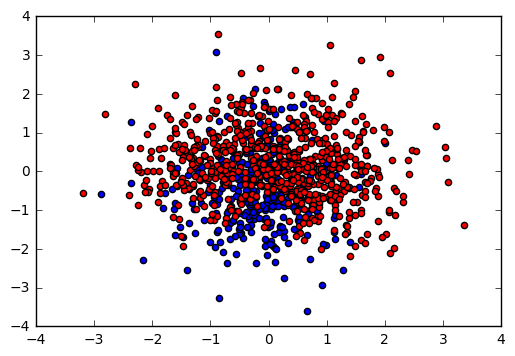

In [876]:
plt.scatter(Xdata[ydata==1.,0],Xdata[ydata==1.,1])
plt.scatter(Xdata[ydata==0.,0],Xdata[ydata==0.,1],c='r')
plt.show()

In [877]:
get_grad(xtest,ytest,W1test,w2test)

[array([-0.        , -0.61644614, -0.39510825, -0.39072851]),
 array([[ 0.        ,  0.        ],
        [ 0.21139434, -0.41147158],
        [ 0.58411849, -1.1369659 ],
        [-0.82467227,  1.60519529]])]

In [878]:
import pickle

In [879]:
with open('theano_test_data.pl','w') as datafile:
    pickle.dump((Xdata,ydata),datafile)